In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from numpy import trapz
plt.style.use('seaborn-darkgrid')

In [2]:
sonic = pd.read_csv('sonic.csv',header=3,names=['time','u','v','w','temp'])

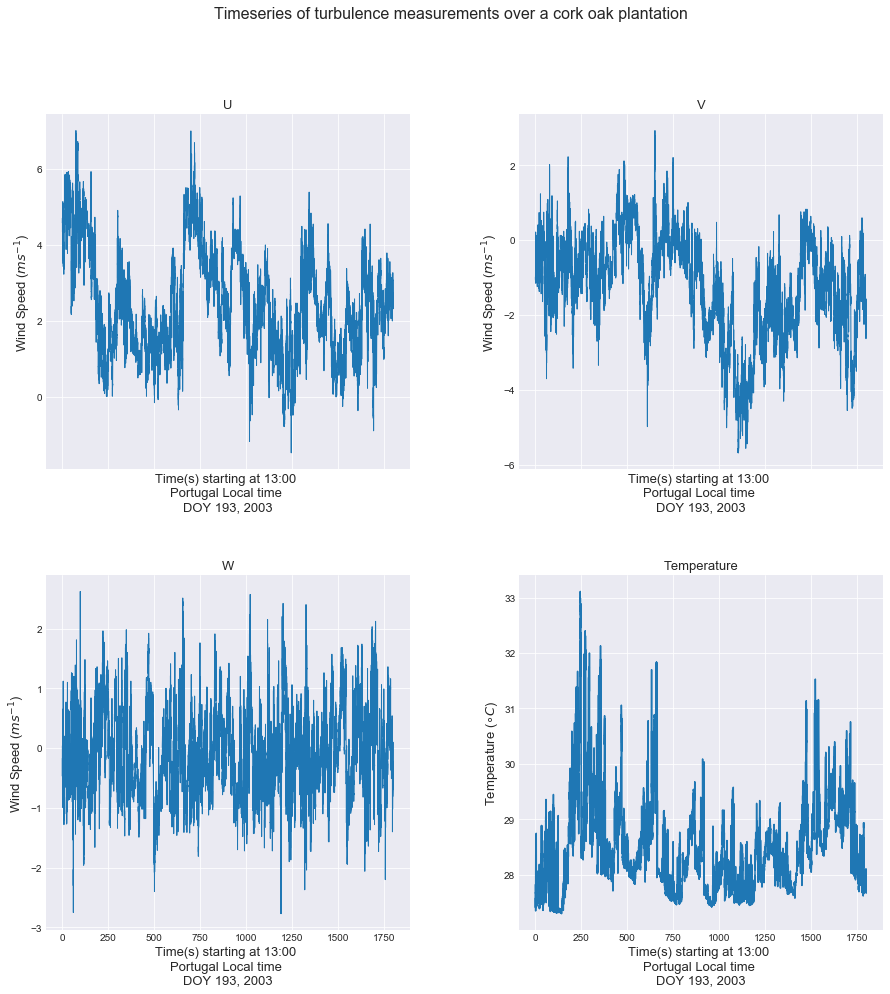

In [3]:
f, ax = plt.subplots(2, 2,sharex='all')
f.suptitle('Timeseries of turbulence measurements over a cork oak plantation', fontsize=16)

ax[0,0].plot(sonic['time'], sonic['u'],linewidth=1)
ax[0,1].plot(sonic['time'], sonic['v'],linewidth=1)
ax[1,0].plot(sonic['time'], sonic['w'],linewidth=1)
ax[1,1].plot(sonic['time'], sonic['temp'])

ax[0,0].set_ylabel('Wind Speed ($m s^{-1}$)', fontsize=13)
ax[0,1].set_ylabel('Wind Speed ($m s^{-1}$)', fontsize=13)
ax[1,0].set_ylabel('Wind Speed ($m s^{-1}$)', fontsize=13)
ax[1,1].set_ylabel('Temperature ($\circ C$)', fontsize=13)  

ax[0,0].set_title('U', fontsize=13)
ax[0,1].set_title('V', fontsize=13)
ax[1,0].set_title('W', fontsize=13)
ax[1,1].set_title('Temperature', fontsize=13)  


plt.subplots_adjust(hspace = 0.3,wspace=0.3)

ax[0,0].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)
ax[0,1].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)
ax[1,1].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)
ax[1,0].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)


f.set_figheight(15)
f.set_figwidth(15)

In [4]:
mean_u=sonic['u'].mean()
mean_v=sonic['v'].mean()
mean_w=sonic['w'].mean()
mean_temp=sonic['temp'].mean()

print("Average U is ", mean_u)
print("Average V is ", mean_v)
print("Average W is ", mean_w)
print("Average TEMP is ", mean_temp)

Average U is  2.4258988888888884
Average V is  -1.2517449999999999
Average W is  -0.09672944444444448
Average TEMP is  28.49176611111111


In [5]:
sonic['u_prime']=sonic['u']-mean_u
sonic['v_prime']=sonic['v']-mean_v
sonic['w_prime']=sonic['w']-mean_w
sonic['t_prime']=sonic['temp']-mean_temp

In [6]:
sonic.head()

,time,u,v,w,temp,u_prime,v_prime,w_prime,t_prime
0,0.00,4.57,-1.05,-0.17,27.58,2.144101,0.201745,-0.073271,-0.911766
1,0.05,4.49,-1.07,-0.21,27.49,2.064101,0.181745,-0.113271,-1.001766
2,0.10,4.58,-0.98,-0.47,27.41,2.154101,0.271745,-0.373271,-1.081766
3,0.15,4.58,-1.06,-0.35,27.47,2.154101,0.191745,-0.253271,-1.021766
4,0.20,4.52,-1.07,-0.39,27.46,2.094101,0.181745,-0.293271,-1.031766


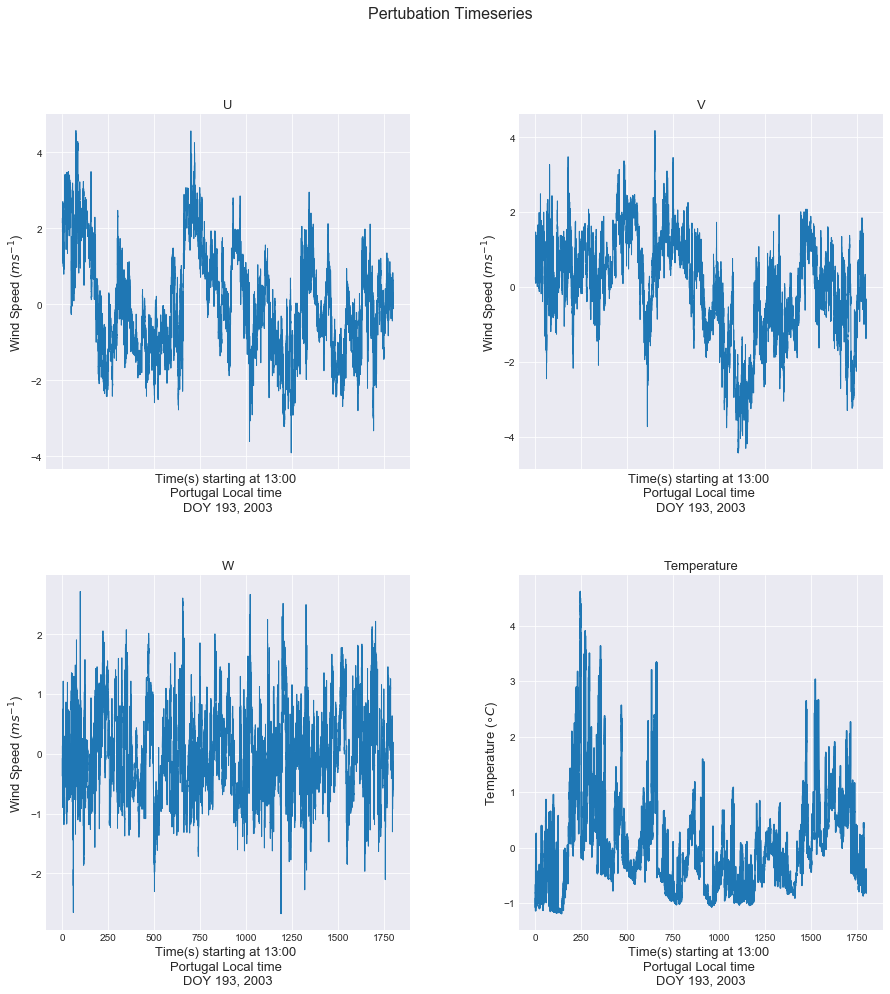

In [7]:
f, ax = plt.subplots(2, 2,sharex='all')
f.suptitle('Pertubation Timeseries', fontsize=16)

ax[0,0].plot(sonic['time'], sonic['u_prime'],linewidth=1)
ax[0,1].plot(sonic['time'], sonic['v_prime'],linewidth=1)
ax[1,0].plot(sonic['time'], sonic['w_prime'],linewidth=1)
ax[1,1].plot(sonic['time'], sonic['t_prime'])

ax[0,0].set_ylabel('Wind Speed ($m s^{-1}$)', fontsize=13)
ax[0,1].set_ylabel('Wind Speed ($m s^{-1}$)', fontsize=13)
ax[1,0].set_ylabel('Wind Speed ($m s^{-1}$)', fontsize=13)
ax[1,1].set_ylabel('Temperature ($\circ C$)', fontsize=13)  

ax[0,0].set_title('U', fontsize=13)
ax[0,1].set_title('V', fontsize=13)
ax[1,0].set_title('W', fontsize=13)
ax[1,1].set_title('Temperature', fontsize=13)  


plt.subplots_adjust(hspace = 0.3,wspace=0.3)

ax[0,0].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)
ax[0,1].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)
ax[1,1].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)
ax[1,0].set_xlabel('Time(s) starting at 13:00 \nPortugal Local time \nDOY 193, 2003', fontsize=13)


f.set_figheight(15)
f.set_figwidth(15)



In [8]:
mean_prime_u=sonic['u_prime'].mean()
mean_prime_v=sonic['v_prime'].mean()
mean_prime_w=sonic['w_prime'].mean()
mean_prime_temp=sonic['t_prime'].mean()

print("Average U' is ", round(mean_prime_u,4))
print("Average V' is ", round(mean_prime_v,4))
print("Average W' is ", round(mean_prime_w,4))
print("Average T' is ", round(mean_prime_temp,4))

Average U' is  0.0
Average V' is  -0.0
Average W' is  0.0
Average T' is  -0.0


In [9]:
sonic['var_u'] = sonic['u_prime']**2
sonic['var_v'] = sonic['v_prime']**2
sonic['var_w'] = sonic['w_prime']**2
sonic['var_t'] = sonic['t_prime']**2

In [10]:
u_var=sonic['var_u'].mean()
v_var=sonic['var_v'].mean()
w_var=sonic['var_w'].mean()
t_var=sonic['var_t'].mean()

print("Variance of U is ", round(u_var,4))
print("Variance of V is ", round(v_var,4))
print("Variance of W is ", round(w_var,4))
print("Variance of T is ", round(t_var,4))

Variance of U is  1.8589
Variance of V is  1.7282
Variance of W is  0.4779
Variance of T is  0.7337


In [11]:
TKE = (0.5)*(u_var+v_var+w_var)
print('TKE is' , TKE)

TKE is 2.0325195279978394


In [12]:
usqr=sonic['u']**2
vsqr=sonic['v']**2
wsqr=sonic['w']**2

M = np.sqrt(usqr.mean()+vsqr.mean()+wsqr.mean())
turb_intensity_u=np.sqrt(u_var)/M
turb_intensity_v=np.sqrt(v_var)/M
turb_intensity_w=np.sqrt(w_var)/M
# turb_intensity_temp=np.sqrt(t_var)/M

print("Turbulent Intensity of U is", round(turb_intensity_u,4))
print("Turbulent Intensity of V is", round(turb_intensity_v,4))
print("Turbulent Intensity of W is", round(turb_intensity_w,4))
# print("Turbulent Intensity of T is", round(turb_intensity_temp,4))

Turbulent Intensity of U is 0.4016
Turbulent Intensity of V is 0.3872
Turbulent Intensity of W is 0.2036


In [13]:
sonic['uprime_wprime'] = sonic['u_prime']*sonic['w_prime']
sonic['vprime_wprime'] = sonic['v_prime']*sonic['w_prime']
sonic['tprime_wprime'] = sonic['t_prime']*sonic['w_prime']

In [14]:
uw_covar=sonic['uprime_wprime'].mean()
vw_covar=sonic['vprime_wprime'].mean()
tw_covar=sonic['tprime_wprime'].mean()

print("Average U'W' is ", round(uw_covar,4))
print("Average V'W' is ", round(vw_covar,4))
print("Average T'W' is ", round(tw_covar,4))


Average U'W' is  -0.2848
Average V'W' is  0.1021
Average T'W' is  0.3086


In [15]:
temp_K=sonic['t_prime']+273.15
tprime_wprimeK= temp_K*sonic['w_prime']
tw_covarK=np.mean(tprime_wprimeK)

Cp=1004.67    # J/(kgK).
rho= 1        # kg/m3
sens_heat_flux= rho*Cp*tw_covarK
print("Sensible Heat Flux is", round(sens_heat_flux,4))

# stresses=turbulent_heat_flux/(1004.67)
stresses=(rho)*uw_covar
print("Stress is", stresses/1000)

Sensible Heat Flux is 310.0416
Stress is -0.00028483165375493824


In [16]:
bowen = 0.4
latent = sens_heat_flux/bowen
round(latent,4)

775.1041

In [17]:
gamma= 0.4    #(gwater kgair–1)·K–1 
rho_L = 1000
evap=(rho/rho_L)*gamma*latent
evap

0.3100416464205606

$joule = kg⋅m^2⋅s^{−2}$

$watt = kg⋅m^2⋅s^{−3}$

$Pascal = kg⋅m^{-1}⋅s^{−2}$

$Flux = kg⋅s^{−3}$

$Stress = \frac{kg}{m·s^2}$

$rho=\frac{kg}{m^3}$

$\gamma = \frac{gwater}{kgair K}$


In [18]:
whis = pd.read_csv('WhistlerDataAM.csv',header=4,
                    names=['time','net_rad','temp2','rel_hum2','temp10','rel_hum10','press'],
                    usecols=[1,2,3,4,5,6,7])

whis['delta_theta']= whis['temp10'] - whis['temp2'] + (0.0098)*(10-2)

In [19]:
b = 17.2694
eo = 0.6113
T1 = 273.15 
T2 = 35.86 
T=whis['temp2']+273.15

es=eo*np.exp((b*(T-T1))/(T-T2))
e=whis['rel_hum2']*es/100
eps=622   #g·kg–1
whis['r2']= eps*e/(whis['press']-e)


T=whis['temp10']+273.15
es=eo*np.exp((b*(T-T1))/(T-T2))
e=whis['rel_hum10']*es/100
eps=622   #g·kg–1
whis['r10']= eps*e/(whis['press']-e)

print('Average 2m Mixing Ratio is',whis['r2'].mean())
print('Average 10m Mixing Ratio is',whis['r10'].mean())

Average 2m Mixing Ratio is 2.5717055752431204
Average 10m Mixing Ratio is 2.656910303007412


In [20]:
delta_r=whis['r10'].mean() - whis['r2'].mean()
whis['FH']=(-0.9*whis['net_rad'])/((delta_r/(gamma*whis['delta_theta']))+1)
whis['FE']=(-0.9*whis['net_rad'])/(((gamma*whis['delta_theta'])/delta_r)+1)

In [21]:
print('Average Sensible Heat Flux is',whis['FH'].mean())
print('Average Latent Heat Flux is',whis['FE'].mean())

Average Sensible Heat Flux is -29.494891493004488
Average Latent Heat Flux is -2.15860850699551
